In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Парето и Центральная предельная теорема

Зададим распределение Парето, где x0 и k - параметры для определения матожидания и дисперсии (https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)

In [2]:
x0 = 2
k = 3
pareto = sts.pareto(k, loc=0, scale=x0)

Сгенерируем выборку объёма 1000 и построим гистрограмму с теоретической плотностью.

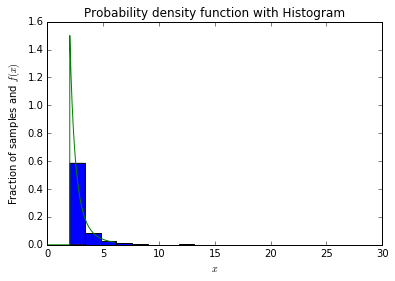

In [14]:
pareto_sample = pareto.rvs(1000)
x = np.linspace(0, 6, 1000)
pdf = pareto.pdf(x)
plt.hist(pareto_sample, bins=20, normed=True)
plt.plot(x, pdf)
plt.xlabel('$x$'), plt.ylabel('Fraction of samples and $f(x)$')
plt.title('Probability density function with Histogram')

Сгенерируем 1000 выборок объёма n.

In [159]:
n = 5
means_5 = []
for _ in range(1000):
    m = pareto.rvs(n).mean()
    means_5.append(m)

m - это случайная величина, которая согласно ЦПТ имеет нормальное распределение со средним значением 3 ([k*x0] / [k-1] = 3) и с дисперсией, зависящей от n.

Определим mu и sigma для приближения нашей функции нормальным распределением и построим гистрограмму выборочных средних для n = 5.

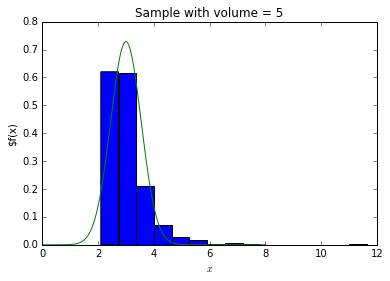

In [192]:
mu = k * x0 / (k - 1) #Формулы для расчёта матожидания и дисперсии взяты с википедии (см. ссылку выше)
sigma = np.sqrt(((x0 / (k - 1))**2 * (k / (k - 2))) / n)
norm = sts.norm(loc=mu, scale=sigma)

x = np.linspace(0, 8, 1000)
pdf = norm.pdf(x)
plt.hist(means_5, bins=15, normed=True)
plt.plot(x, pdf)
plt.xlabel('$x$'), plt.ylabel('$f(x)')
plt.title('Sample with volume = 5')

Повторим тоже самое для n = 10 и n = 50. Не забывая что сигма в общем случае зависит от n!

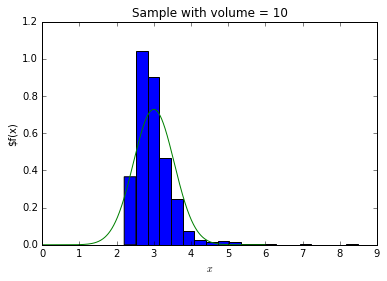

In [206]:
n = 10
means_10 = []
for _ in range(1000):
    m = pareto.rvs(n).mean()
    means_10.append(m)

sigma = np.sqrt(((x0 / (k - 1))**2 * k / (k - 2)) / n)
norm = sts.norm(loc=mu, scale=sigma)
x = np.linspace(0, 6, 1000)
pdf = norm.pdf(x)
plt.hist(means_10, bins=20, normed=True)
plt.plot(x, pdf)
plt.xlabel('$x$'), plt.ylabel('$f(x)')
plt.title('Sample with volume = 10')

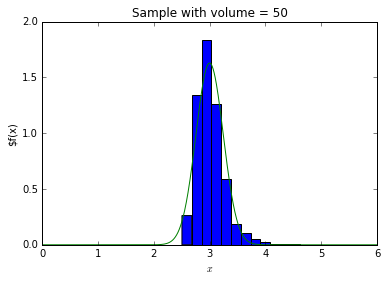

In [216]:
n = 50
means_50 = []
for _ in range(1000):
    m = pareto.rvs(n).mean()
    means_50.append(m)

sigma = np.sqrt(((x0 / (k - 1))**2 * k / (k - 2)) / n)
norm = sts.norm(loc=mu, scale=sigma)
x = np.linspace(0, 6, 1000)
pdf = norm.pdf(x)
plt.hist(means_50, bins=12, normed=True)
plt.plot(x, pdf)
plt.xlabel('$x$'), plt.ylabel('$f(x)')
plt.title('Sample with volume = 50')

На графиках отчётливо видно, что при увеличении объёма выборки (n) растёт и точность апроксимации распределения выборочных средних с помошью нормального распределения с соответствующими парамметрами (mu и sigma). 